In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

C:\Users\kater\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kater\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Data upload and data analysis.

In [52]:
data=pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv")
data.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [53]:
data.columns=["Date","All Formulations", "All Conventional", "All Reformulated", "Regular Formulations", "Regular Conventional", 
               "Regular Reformulated", "Midgrade Formulations", "Midgrade Conventional", "Midgrade Reformulated",
              "Premium Formulations", "Premium Conventional", "Premium Reformulated", "Diesel Retail"
              ]

In [54]:
data.head()

,Date,All Formulations,All Conventional,All Reformulated,Regular Formulations,Regular Conventional,Regular Reformulated,Midgrade Formulations,Midgrade Conventional,Midgrade Reformulated,Premium Formulations,Premium Conventional,Premium Reformulated,Diesel Retail
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1361 non-null   object 
 1   All Formulations       1361 non-null   float64
 2   All Conventional       1361 non-null   float64
 3   All Reformulated       1361 non-null   float64
 4   Regular Formulations   1361 non-null   float64
 5   Regular Conventional   1361 non-null   float64
 6   Regular Reformulated   1361 non-null   float64
 7   Midgrade Formulations  1361 non-null   float64
 8   Midgrade Conventional  1361 non-null   float64
 9   Midgrade Reformulated  1361 non-null   float64
 10  Premium Formulations   1361 non-null   float64
 11  Premium Conventional   1361 non-null   float64
 12  Premium Reformulated   1361 non-null   float64
 13  Diesel Retail          1361 non-null   float64
dtypes: float64(13), object(1)
memory usage: 149.0+ KB


In [56]:
data.describe()

,All Formulations,All Conventional,All Reformulated,Regular Formulations,Regular Conventional,Regular Reformulated,Midgrade Formulations,Midgrade Conventional,Midgrade Reformulated,Premium Formulations,Premium Conventional,Premium Reformulated,Diesel Retail
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699
std,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646
min,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000
25%,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000
50%,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000
75%,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000
max,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000


In [58]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data=data.resample("M").mean()

In [59]:
data.index

DatetimeIndex(['1995-01-31', '1995-02-28', '1995-03-31', '1995-04-30',
               '1995-05-31', '1995-06-30', '1995-07-31', '1995-08-31',
               '1995-09-30', '1995-10-31',
               ...
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', name='Date', length=313, freq='M')

Text(0.5, 0, 'Price')

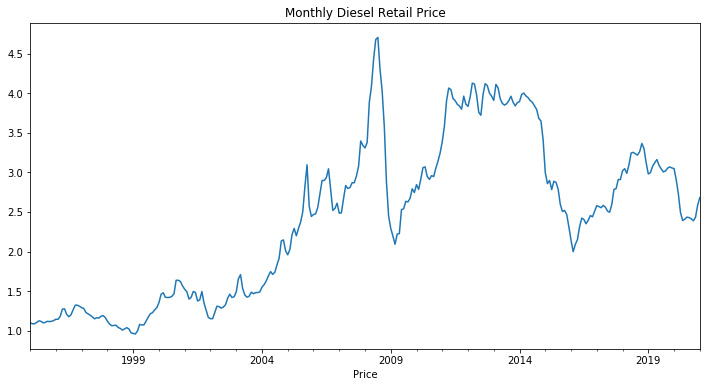

In [60]:
plt.figure(figsize=(12,6))
data["Diesel Retail"].plot(x="Date")
plt.title("Monthly Diesel Retail Price")
plt.xlabel("Price")

## Run an ETS decomposition

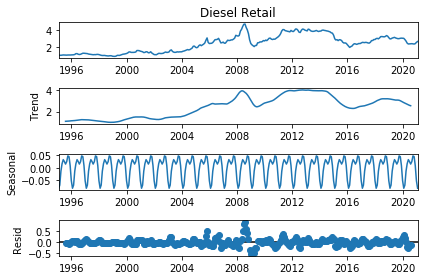

In [61]:
result=seasonal_decompose(data["Diesel Retail"])
result.plot();

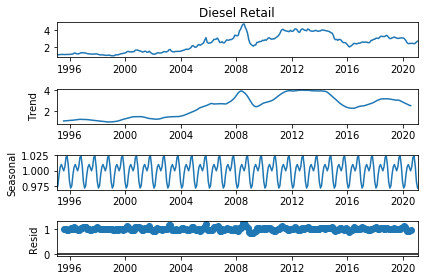

In [63]:
result=seasonal_decompose(data["Diesel Retail"], model="multiplicative")
result.plot();

## Run pdmarima to see the recommended orders

In [66]:
auto_arima(data["Diesel Retail"], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  313
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 259.676
Date:                Thu, 25 Feb 2021   AIC                           -511.353
Time:                        06:45:49   BIC                           -496.381
Sample:                             0   HQIC                          -505.369
                                - 313                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4967      0.155     -3.205      0.001      -0.800      -0.193
ma.L1          1.0536      0.158      6.684      0.000       0.745       1.363
ma.L2          0.4180      0.072      5.836      0.000       0.278       0.558
sigma2         0.0111      0.000     22.555      0.000       0.010       0.012
===================================================================================
Ljung-Box (Q):                       58.76   Jarque-Bera (JB):               571.08
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               3.24   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Let's force seasonality since the original model arima didn't choose seasonality and then run both the models to see which one is the best predictors. **

In [65]:
auto_arima(data["Diesel Retail"], seasonal=True, m=12, D=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  313
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 204.236
Date:                            Thu, 25 Feb 2021   AIC                           -398.473
Time:                                    06:45:04   BIC                           -379.937
Sample:                                         0   HQIC                          -391.056
                                            - 313                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4478      0.038     38.445      0.000       1.374       1.522
ar.L2         -0.4838      0.037    -12.954      0.000      -0.557      -0.411
ar.S.L12      -0.6436      0.031    -20.918      0.000      -0.704      -0.583
ar.S.L24      -0.3945      0.033    -12.007      0.000      -0.459      -0.330
sigma2         0.0146      0.001     18.778      0.000       0.013       0.016
===================================================================================
Ljung-Box (Q):                       98.99   Jarque-Bera (JB):               107.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Split the data into train test data

In [68]:
len(data)

313

In [89]:
train=data.iloc[:276]
test=data.iloc[276:]

## Fit into SARIMA (1, 1, 2), the first model choosen by auto arima

In [70]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [90]:
model=ARIMA(train["Diesel Retail"], order=(1,1,2))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Diesel Retail   No. Observations:                  275
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 219.398
Method:                       css-mle   S.D. of innovations              0.109
Date:                Thu, 25 Feb 2021   AIC                           -428.797
Time:                        07:43:22   BIC                           -410.713
Sample:                    02-28-1995   HQIC                          -421.539
                         - 12-31-2017                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0065      0.011      0.603      0.547      -0.015       0.028
ar.L1.D.Diesel Retail    -0.5296      0.168     -3.160      0.002      -0.858      -0.201
ma.L1.D.Diesel Retail     1.0765      0.159      6.778      0.000       0.765       1.388
ma.L2.D.Diesel Retail     0.4285      0.085      5.051      0.000       0.262       0.595
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8883           +0.0000j            1.8883            0.5000
MA.1           -1.2560           -0.8695j            1.5276           -0.4036
MA.2           -1.2560           +0.8695j            1.5276            0.4036
-----------------------------------------------------------------------------
"""

## Predict the test data

In [91]:
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels').rename("ARIMA (1,1,2) Predictions")

In [92]:
test["Diesel Retail"]

Date
2018-01-31    3.01840
2018-02-28    3.04575
2018-03-31    2.98750
2018-04-30    3.09580
2018-05-31    3.24375
2018-06-30    3.25275
2018-07-31    3.23280
2018-08-31    3.21825
2018-09-30    3.26225
2018-10-31    3.36540
2018-11-30    3.29950
2018-12-31    3.12280
2019-01-31    2.97975
2019-02-28    2.99650
2019-03-31    3.07625
2019-04-30    3.12100
2019-05-31    3.16125
2019-06-30    3.08850
2019-07-31    3.04520
2019-08-31    3.00500
2019-09-30    3.01620
2019-10-31    3.05300
2019-11-30    3.06875
2019-12-31    3.05500
2020-01-31    3.04750
2020-02-29    2.90950
2020-03-31    2.72860
2020-04-30    2.49300
2020-05-31    2.39225
2020-06-30    2.40800
2020-07-31    2.43375
2020-08-31    2.42920
2020-09-30    2.41375
2020-10-31    2.38875
2020-11-30    2.43200
2020-12-31    2.58475
2021-01-31    2.68050
Freq: M, Name: Diesel Retail, dtype: float64

** Plot predictions against test data.**

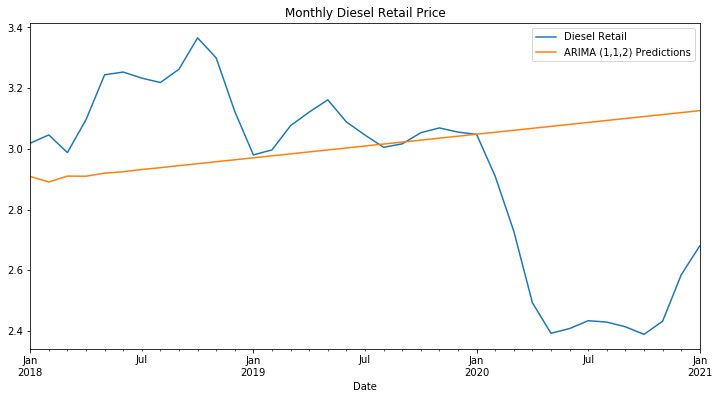

In [93]:
ax=test["Diesel Retail"].plot(legend=True,figsize=(12,6), title="Monthly Diesel Retail Price")
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [94]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

error=rmse(test["Diesel Retail"], predictions)
print(f'ARIMA(1,1,2) RMSE Error: {error}')

ARIMA(1,1,2) RMSE Error: 0.3718655359542886


## Run the SARIMAX (2, 0, 0)x(2, 1, 0, 12) model 

In [95]:
model=SARIMAX(train["Diesel Retail"], order=(2,0,0),seasonal_order=(2,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Diesel Retail   No. Observations:                  276
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 170.958
Date:                            Thu, 25 Feb 2021   AIC                           -331.916
Time:                                    07:43:42   BIC                           -314.036
Sample:                                01-31-1995   HQIC                          -324.731
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4422      0.041     35.576      0.000       1.363       1.522
ar.L2         -0.4776      0.040    -11.874      0.000      -0.556      -0.399
ar.S.L12      -0.6549      0.033    -19.814      0.000      -0.720      -0.590
ar.S.L24      -0.4000      0.035    -11.399      0.000      -0.469      -0.331
sigma2         0.0154      0.001     17.475      0.000       0.014       0.017
===================================================================================
Ljung-Box (Q):                       96.27   Jarque-Bera (JB):                93.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.70   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,0,0)(2,1,0,12) Predictions')

In [97]:
predictions

2018-01-31    2.774789
2018-02-28    2.696797
2018-03-31    2.734229
2018-04-30    2.709892
2018-05-31    2.778390
2018-06-30    2.773960
2018-07-31    2.721164
2018-08-31    2.655283
2018-09-30    2.687225
2018-10-31    2.703339
2018-11-30    2.710275
2018-12-31    2.658459
2019-01-31    2.556603
2019-02-28    2.462708
2019-03-31    2.502946
2019-04-30    2.521245
2019-05-31    2.599587
2019-06-30    2.623952
2019-07-31    2.590719
2019-08-31    2.567642
2019-09-30    2.640863
2019-10-31    2.669535
2019-11-30    2.691650
2019-12-31    2.699543
2020-01-31    2.655427
2020-02-29    2.595943
2020-03-31    2.611273
2020-04-30    2.620855
2020-05-31    2.654538
2020-06-30    2.640029
2020-07-31    2.607766
2020-08-31    2.620877
2020-09-30    2.728730
2020-10-31    2.745161
2020-11-30    2.799128
2020-12-31    2.787586
2021-01-31    2.691640
Freq: M, Name: SARIMA(2,0,0)(2,1,0,12) Predictions, dtype: float64

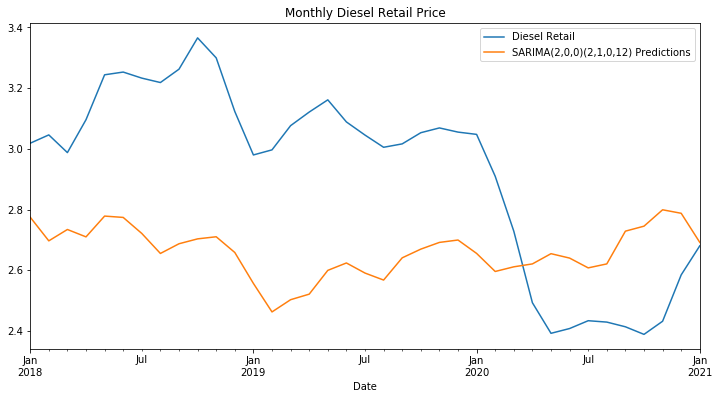

In [98]:
ax=test["Diesel Retail"].plot(legend=True,figsize=(12,6), title="Monthly Diesel Retail Price")
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [99]:
error=rmse(test["Diesel Retail"], predictions)
print(f'SARIMA(2,0,0)(2,1,0,12) RMSE Error: {error}')

SARIMA(2,0,0)(2,1,0,12) RMSE Error: 0.4114087939047507


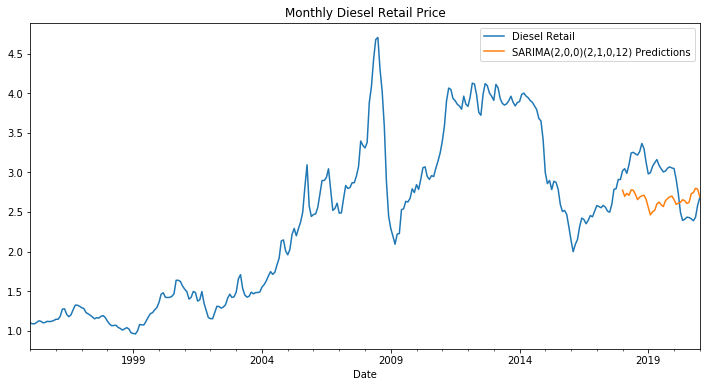

In [100]:
ax=data["Diesel Retail"].plot(legend=True,figsize=(12,6), title="Monthly Diesel Retail Price")
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)